# Importando bibliotecas

In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregando dataset

In [2]:
DATA_PATH = 'dataset/Training.csv'
data = pd.read_csv(DATA_PATH).dropna(axis = 1)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


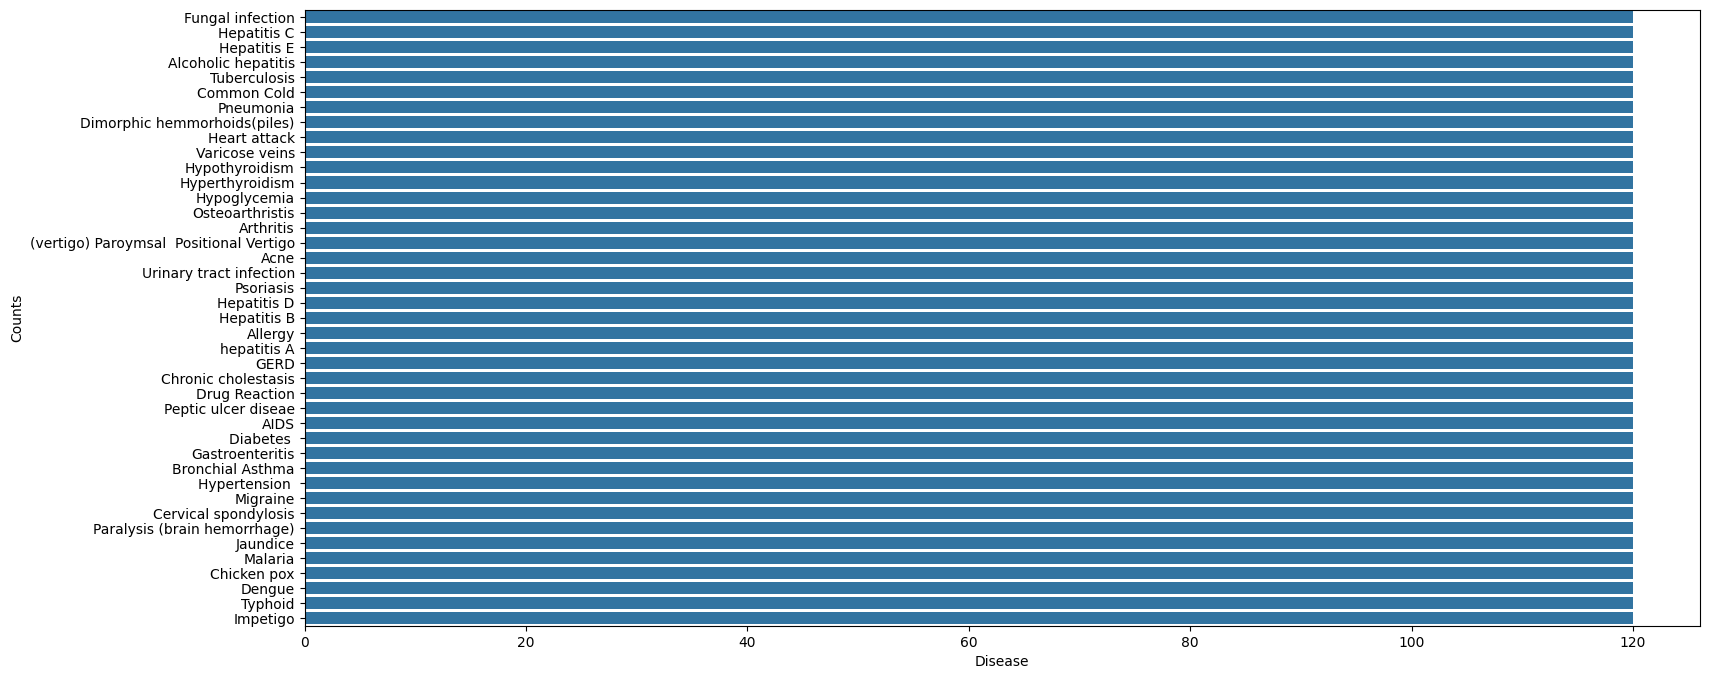

In [3]:
## Checando se a base de dados está balanceada
prognosis_count = data['prognosis'].value_counts()
temp_df = pd.DataFrame({
    'Disease': prognosis_count.values,
    'Counts': prognosis_count.index
})
ax = plt.figure(figsize=(18, 8))
sns.barplot(x = 'Disease', y = 'Counts', data = temp_df);
# Aqui vemos que nossos dados estão todos balanceados contendo 120 samples cada uma das categorias

# Proprocessamento e divisão dos dados

In [4]:
# Como nossos dados já vieram tratados, a unica que coisa que precisamos realizar e o Encode da colunas de Prognóstico
# Para isso iremos utilizar o LabelEncoder na bibliotecas Sklearn

encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])
data['prognosis'].value_counts().index

Index([15, 20, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25, 31,  5,  0,  2, 38,
       35, 21, 19,  4, 40, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28,
       29,  8, 11, 37, 27],
      dtype='int32', name='prognosis')

In [5]:
# Com o encoder das váriáveis feito, podemos iniciar a divisão dos nossos dados em treino e teste
# Para isso vamos utilizar o train_test_split do sklearn

X = data.drop(columns=['prognosis'])
y = data['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Caso a base de dados estivesse desbalanceada poderia ser utilziado o parametro Stratify para fazer a divisão
# E manter coerencia na divisão dos dados

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((3936, 132), (3936,)), ((984, 132), (984,)))

# Criando Modelos

In [6]:
# para uma melhor avaliação do nosso modelo, iremos utilizar k-fold, que ira treinar nosso modelos diversas vezes
# E ira retornar um accuracy_score que foi a metrica que desejamos que ele retorne, assim é possível avaliar melhor
# O desenpenho de cada um dos modelos utilziado

def cv_scoring(estimator, X:pd.DataFrame, y:pd.DataFrame) -> float:
    return accuracy_score(y, estimator.predict(X))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10,
                            n_jobs = -1, 
                            scoring = cv_scoring)
    print('=*='*30)
    print(model_name)
    print(f'Scores: {scores}')
    print(f'Mean Score: {np.mean(scores)}')

=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
=*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*==*=
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


# Criando modelo utilizando todos os modelo anteriores

Accuracy on train SVM:
1.0

Accuracy on train SVM:
1.0



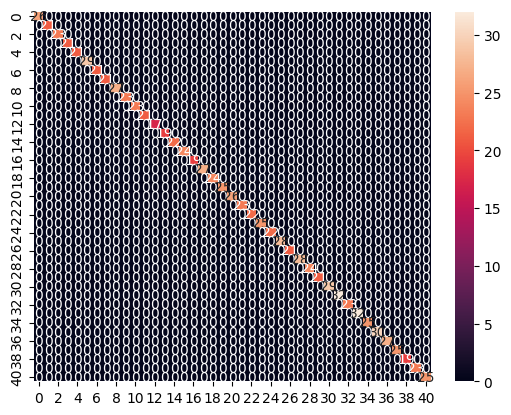

In [7]:
# Para isso vamos treinar cada um dos modelos utilizado no k-fold, pois obtiveram uma ótima pontuação, além disso
# Vamos utilizar a moda dos resultados, para criar um modelo de predição mais robusto

svm_model = SVC()
svm_model.fit(X_train, y_train)
acc_train = accuracy_score(y_train, svm_model.predict(X_train))
acc_test = accuracy_score(y_test, svm_model.predict(X_test))
print(f"Accuracy on train SVM:\n{acc_train}\n")
print(f"Accuracy on train SVM:\n{acc_test}\n")
cm = confusion_matrix(y_test, svm_model.predict(X_test))
sns.heatmap(cm, annot=True);

Accuracy on train GaussianNB:
1.0

Accuracy on train GaussianNB:
1.0



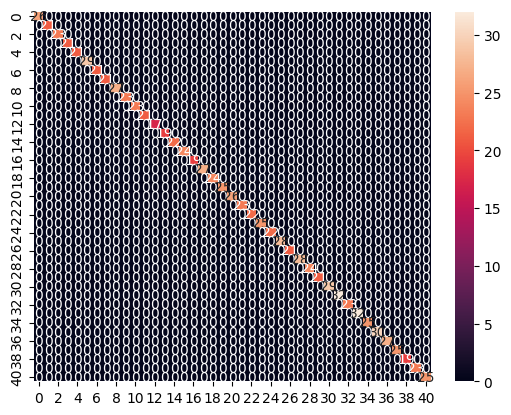

In [8]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
acc_train = accuracy_score(y_train, nb_model.predict(X_train))
acc_test = accuracy_score(y_test, nb_model.predict(X_test))
print(f"Accuracy on train GaussianNB:\n{acc_train}\n")
print(f"Accuracy on train GaussianNB:\n{acc_test}\n")
cm = confusion_matrix(y_test, nb_model.predict(X_test))
sns.heatmap(cm, annot=True);

Accuracy on train RandomForestClassifier:
1.0

Accuracy on train RandomForestClassifier:
1.0



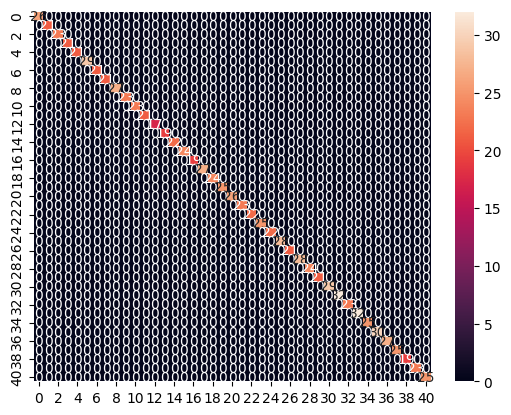

In [9]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
acc_train = accuracy_score(y_train, rfc_model.predict(X_train))
acc_test = accuracy_score(y_test, rfc_model.predict(X_test))
print(f"Accuracy on train RandomForestClassifier:\n{acc_train}\n")
print(f"Accuracy on train RandomForestClassifier:\n{acc_test}\n")
cm = confusion_matrix(y_test, rfc_model.predict(X_test))
sns.heatmap(cm, annot=True);

#### Agora que avaliamos cada um dos modelos individualmente vamos criar um modelo utilizando todos eles

In [59]:
class SGR:
    """
    Ao criar a classe instancie 3 modelos de classificação
    """
    def __init__(self, model1:'Classifier_Model', model2:'Classifier_Model', model3:'Classifier_Model') -> None:
        self.models = [model1, model2, model3]
        
    def fit(self, X:'np.ndarray|pd.DataFrame', y:'np.ndarray|pd.Dataframe') -> None:
        for model in self.models:
            model.fit(X, y)

    def predict(self, X:'np.ndarray|pd.DataFrame') -> list:
        predicts = []
        for model in self.models:
            predicts.append(model.predict(X))
        final_preds = [mode([i, j, k])[0] for i, j, k in zip(predicts[0], predicts[1], predicts[2])]
        return final_preds

In [60]:
model = SGR(
    SVC(),
    GaussianNB(),
    RandomForestClassifier(random_state=18)
)

#### Agora que criamos nosso modelo combinado, vamos utilizar a base de teste para avalia-lo

In [61]:
test_data = pd.read_csv("./dataset/Testing.csv").dropna(axis=1)

In [62]:
test_X = test_data.drop(columns=['prognosis'])
teste_y = encoder.transform(test_data['prognosis'])

In [63]:
model.fit(test_X, teste_y)

In [65]:
predicts_model = model.predict(test_X)

## Avaliando modelo

Accuracy on Test dataset by the combined model: 1.0


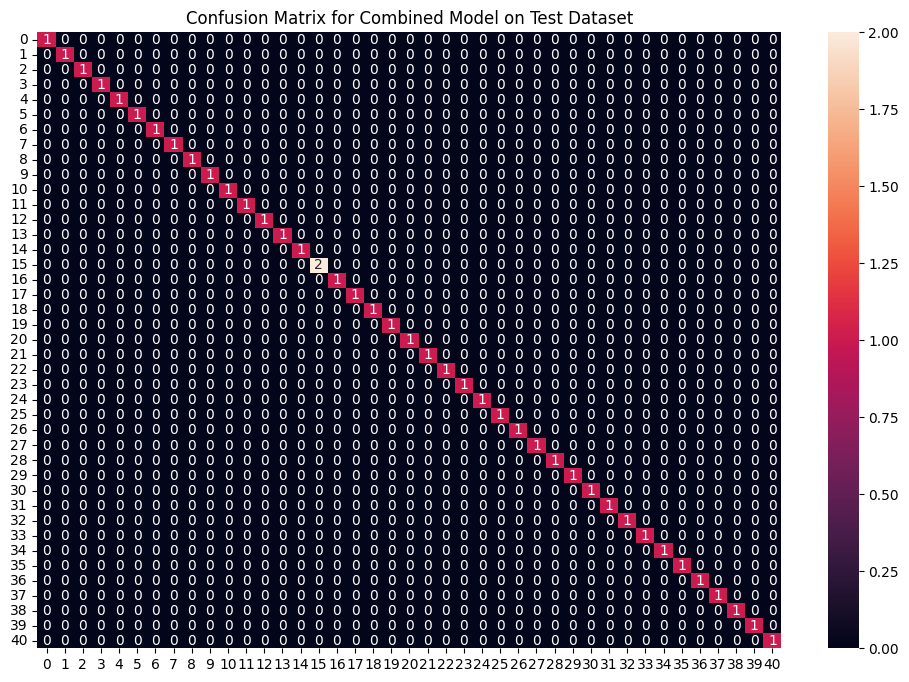

In [68]:
print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(teste_y, predicts_model)}")
 
cf_matrix = confusion_matrix(teste_y, predicts_model)
plt.figure(figsize=(12,8))
 
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

## Criando o vetor de input para o modelo

In [77]:
symptons = X.columns.values

symptom_index = {}
for index, value in enumerate(symptons):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
data_dict = {
    'symptom_index': symptom_index,
    'predictions_classes': encoder.classes_
}

# Cria o vetor de sintomas para o modelo
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
     
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    input_data = np.array(input_data).reshape(1,-1)
    final_prediction = model.predict(input_data)
    predictions = {
        "Prediction": data_dict["predictions_classes"][final_prediction][0]
    }
    return predictions

In [78]:
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'Prediction': 'Fungal infection'}
